### libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

### explore dataset

In [3]:
df1 = pd.read_csv("data/train.csv")
print("Shape of df1:", df1.shape)

Shape of df1: (10683, 12)


In [4]:
print(df1.head(5))

   Unnamed: 0      Airline Date_of_Journey    Source Destination  \
0           0       IndiGo      24/03/2024  Banglore   New Delhi   
1           1    Air India       1/05/2024   Kolkata    Banglore   
2           2  Jet Airways       9/06/2024     Delhi      Cochin   
3           3       IndiGo      12/05/2024   Kolkata    Banglore   
4           4       IndiGo      01/03/2024  Banglore   New Delhi   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   

  Additional_Info     Price  
0         No Info   3312.45  
1         No Info   6512.70  
2         No Info  11799.70  
3         No Info   5285.30  
4       

In [5]:
print(df1.tail())


       Unnamed: 0      Airline Date_of_Journey    Source Destination  \
10678       10678     Air Asia       9/04/2024   Kolkata    Banglore   
10679       10679    Air India      27/04/2024   Kolkata    Banglore   
10680       10680  Jet Airways      27/04/2024  Banglore       Delhi   
10681       10681      Vistara      01/03/2024  Banglore   New Delhi   
10682       10682    Air India       9/05/2024     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info     Price  
10678         No Info   3490.95  
10679         No Info   3523.25  
10680         

In [6]:
print(df1.isnull().sum())


Unnamed: 0         0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [7]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10683 non-null  int64  
 1   Airline          10683 non-null  object 
 2   Date_of_Journey  10683 non-null  object 
 3   Source           10683 non-null  object 
 4   Destination      10683 non-null  object 
 5   Route            10682 non-null  object 
 6   Dep_Time         10683 non-null  object 
 7   Arrival_Time     10683 non-null  object 
 8   Duration         10683 non-null  object 
 9   Total_Stops      10682 non-null  object 
 10  Additional_Info  10683 non-null  object 
 11  Price            10683 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1001.7+ KB
None


In [8]:
print(df1.describe())


         Unnamed: 0         Price
count  10683.000000  10683.000000
mean    5341.000000   7724.004502
std     3084.060797   3919.655292
min        0.000000   1495.150000
25%     2670.500000   4485.450000
50%     5341.000000   7116.200000
75%     8011.500000  10517.050000
max    10682.000000  67585.200000


In [9]:
print("Unique Airlines:", df1["Airline"].unique())
for col in df1:
    print(f"Number of unique {col}s -->> {df1[col].nunique()}")


Unique Airlines: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Number of unique Unnamed: 0s -->> 10683
Number of unique Airlines -->> 12
Number of unique Date_of_Journeys -->> 44
Number of unique Sources -->> 5
Number of unique Destinations -->> 6
Number of unique Routes -->> 128
Number of unique Dep_Times -->> 222
Number of unique Arrival_Times -->> 1343
Number of unique Durations -->> 368
Number of unique Total_Stopss -->> 5
Number of unique Additional_Infos -->> 9
Number of unique Prices -->> 1870


In [10]:
for col in df1:
    print(df1[col].value_counts())

Unnamed: 0
0        1
7115     1
7117     1
7118     1
7119     1
        ..
3562     1
3563     1
3564     1
3565     1
10682    1
Name: count, Length: 10683, dtype: int64
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Date_of_Journey
18/05/2024    504
6/06/2024     503
21/05/2024    497
9/06/2024     495
12/06/2024    493
9/05/2024     484
21/03/2024    423
15/05/2024    405
27/05/2024    382
27/06/2024    355
24/06/2024    351
1/06/2024     342
3/06/2024     333
15/06/2024    328
24/03/2024    323
6/0

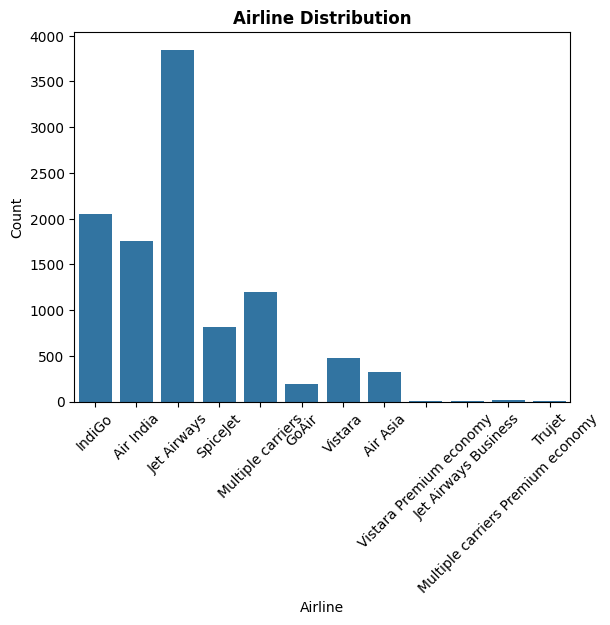

In [11]:
sns.countplot(x="Airline", data=df1)
plt.title("Airline Distribution", fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

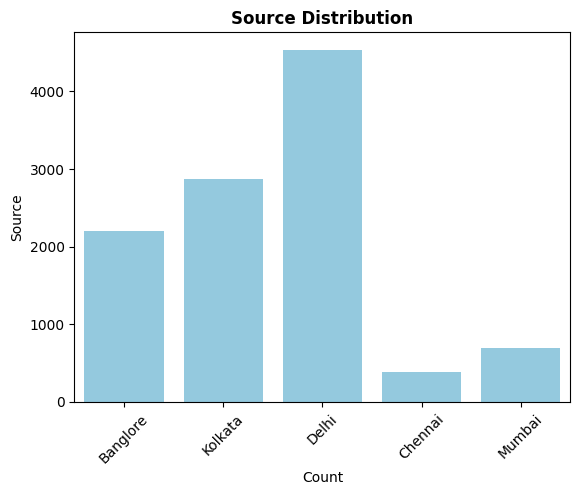

In [12]:
sns.countplot(x="Source", data=df1, color="skyblue")
plt.title("Source Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Source")
plt.xticks(rotation=45)
plt.show()

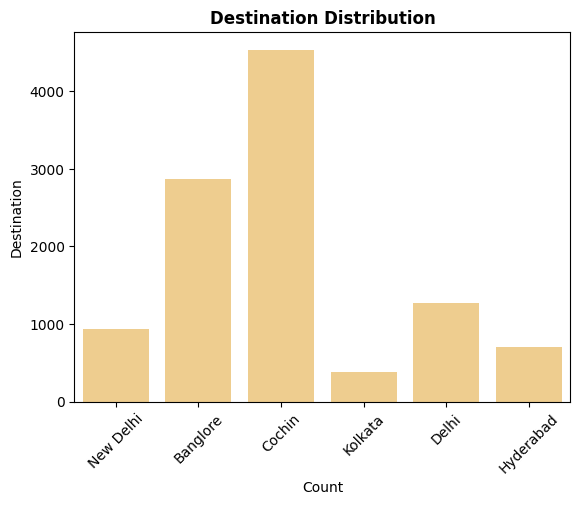

In [13]:
sns.countplot(x=df1["Destination"], color="orange", alpha=0.5)
plt.title("Destination Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Destination")
plt.xticks(rotation=45)
plt.show()


Top 10 routes:
 Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: count, dtype: int64


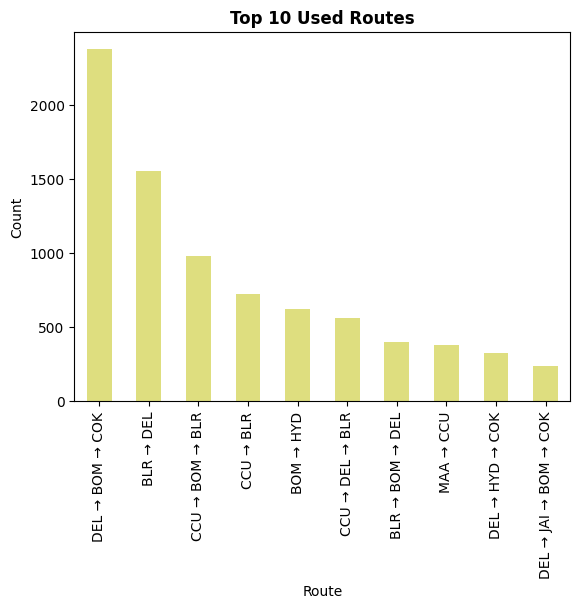

In [14]:
top_routes = df1["Route"].value_counts().sort_values(ascending=False)[:10]
print("Top 10 routes:\n", top_routes)
top_routes.plot(kind="bar", color="y", alpha=0.5)
plt.title("Top 10 Used Routes", fontweight="bold")
plt.ylabel("Count")
plt.show()

In [15]:
bottom_routes = df1["Route"].value_counts().sort_values(ascending=True)[:10]
print("Bottom routes:\n", bottom_routes)

Bottom routes:
 Route
BOM → BBI → HYD                      1
BOM → RPR → VTZ → HYD                1
BLR → CCU → BBI → HYD → VGA → DEL    1
BLR → BOM → IXC → DEL                1
BLR → HBX → BOM → NAG → DEL          1
BOM → VNS → DEL → HYD                1
BOM → JAI → DEL → HYD                1
CCU → IXB → DEL → BLR                1
BOM → GOI → HYD                      1
BOM → DED → DEL → HYD                1
Name: count, dtype: int64


Total_Stops value counts:
Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64


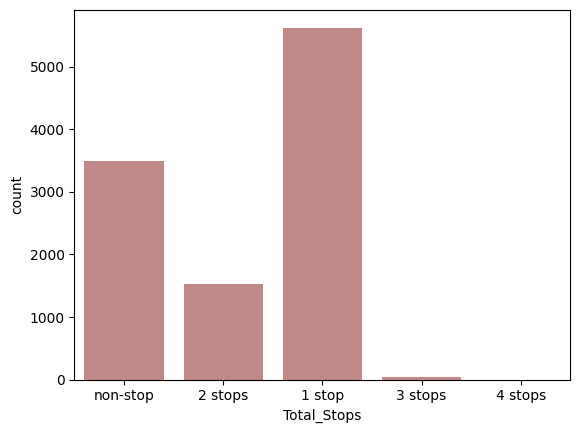

In [16]:
print("Total_Stops value counts:")
print(df1["Total_Stops"].value_counts())
sns.countplot(x=df1["Total_Stops"], color="brown", alpha=0.6)
plt.show()

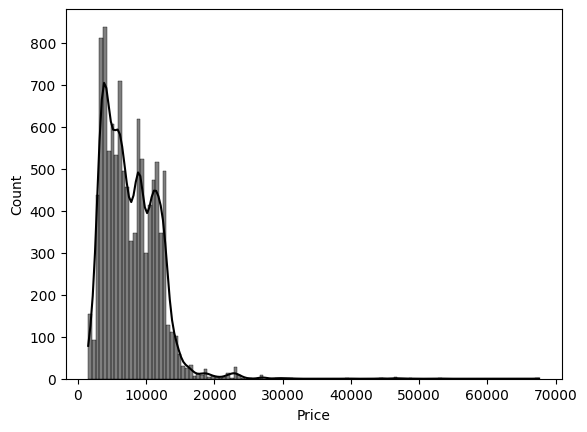

In [17]:
sns.histplot(x=df1["Price"], kde=True, color="black")
plt.show()


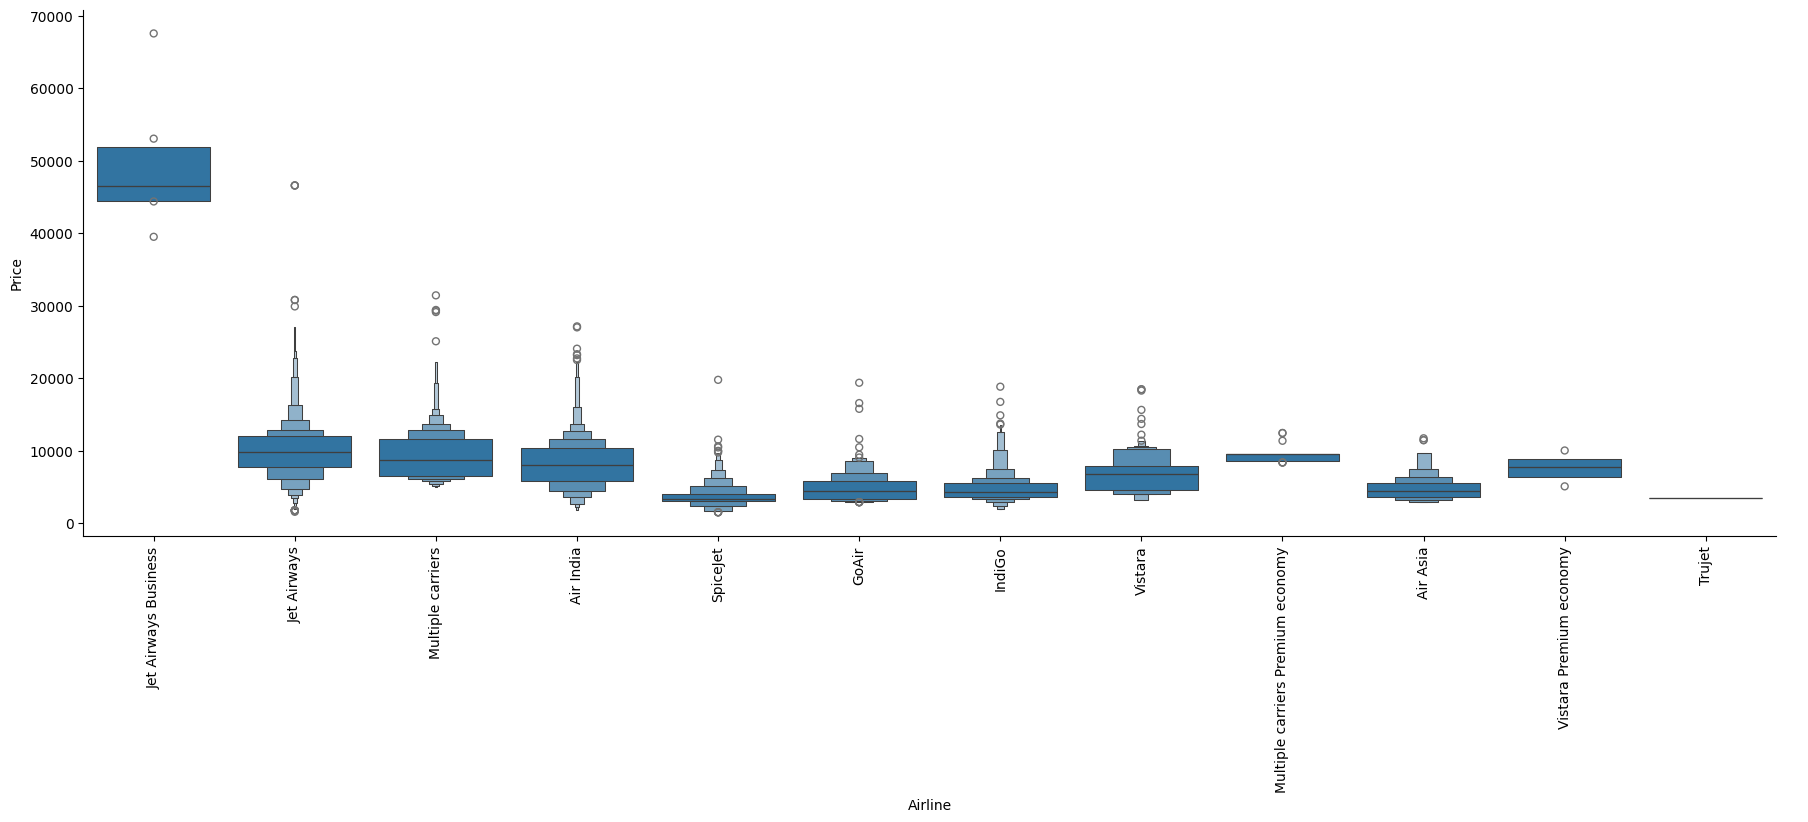

In [18]:
sns.catplot(x="Airline", y="Price", data=df1.sort_values("Price", ascending=False),
            kind="boxen", height=6, aspect=3)
plt.xticks(rotation=90)
plt.show()

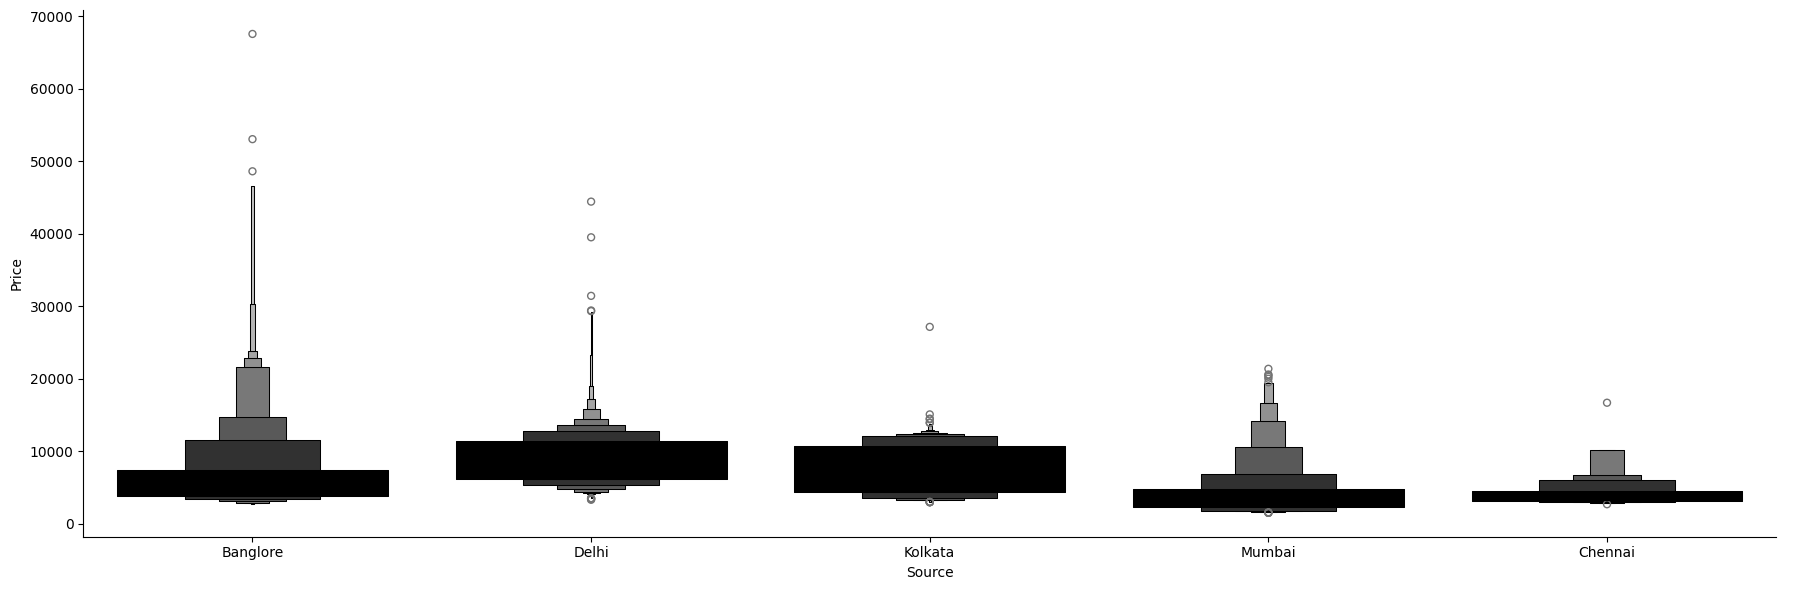

In [19]:
sns.catplot(x="Source", y="Price", data=df1.sort_values("Price", ascending=False),
            kind="boxen", color="black", height=6, aspect=3)
plt.show()

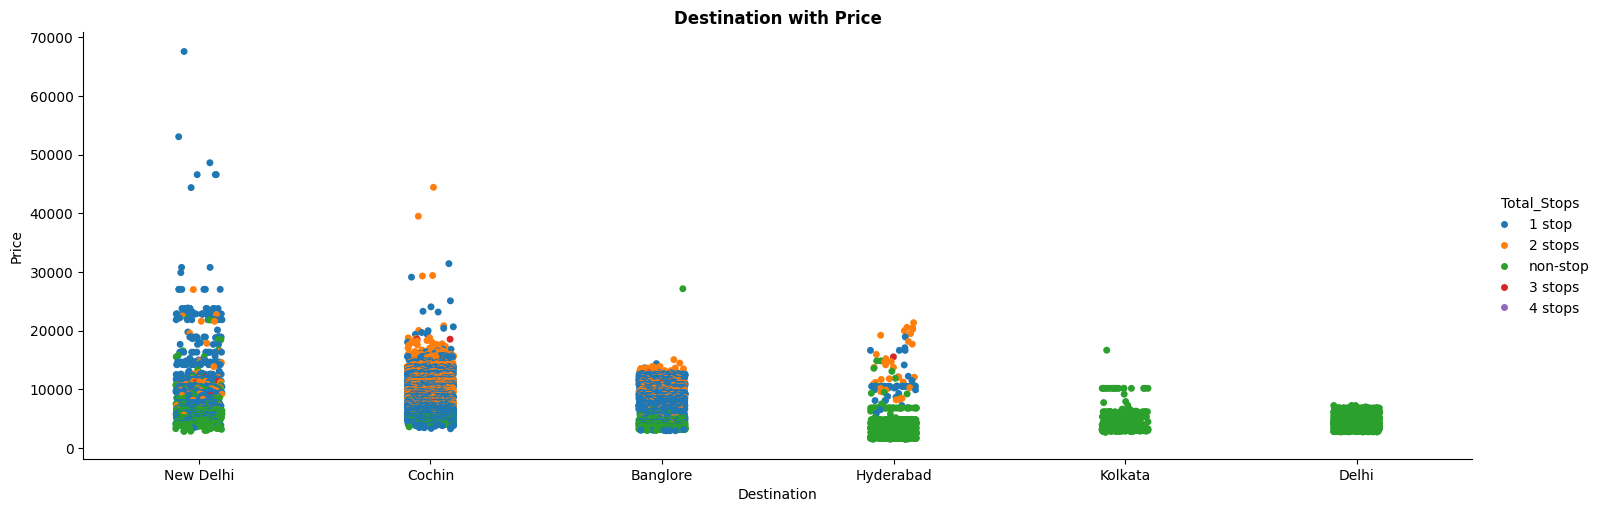

In [20]:
sns.catplot(x="Destination", y="Price", data=df1.sort_values("Price", ascending=False),
            hue="Total_Stops", aspect=3)
plt.title("Destination with Price", fontweight="bold")
plt.show()

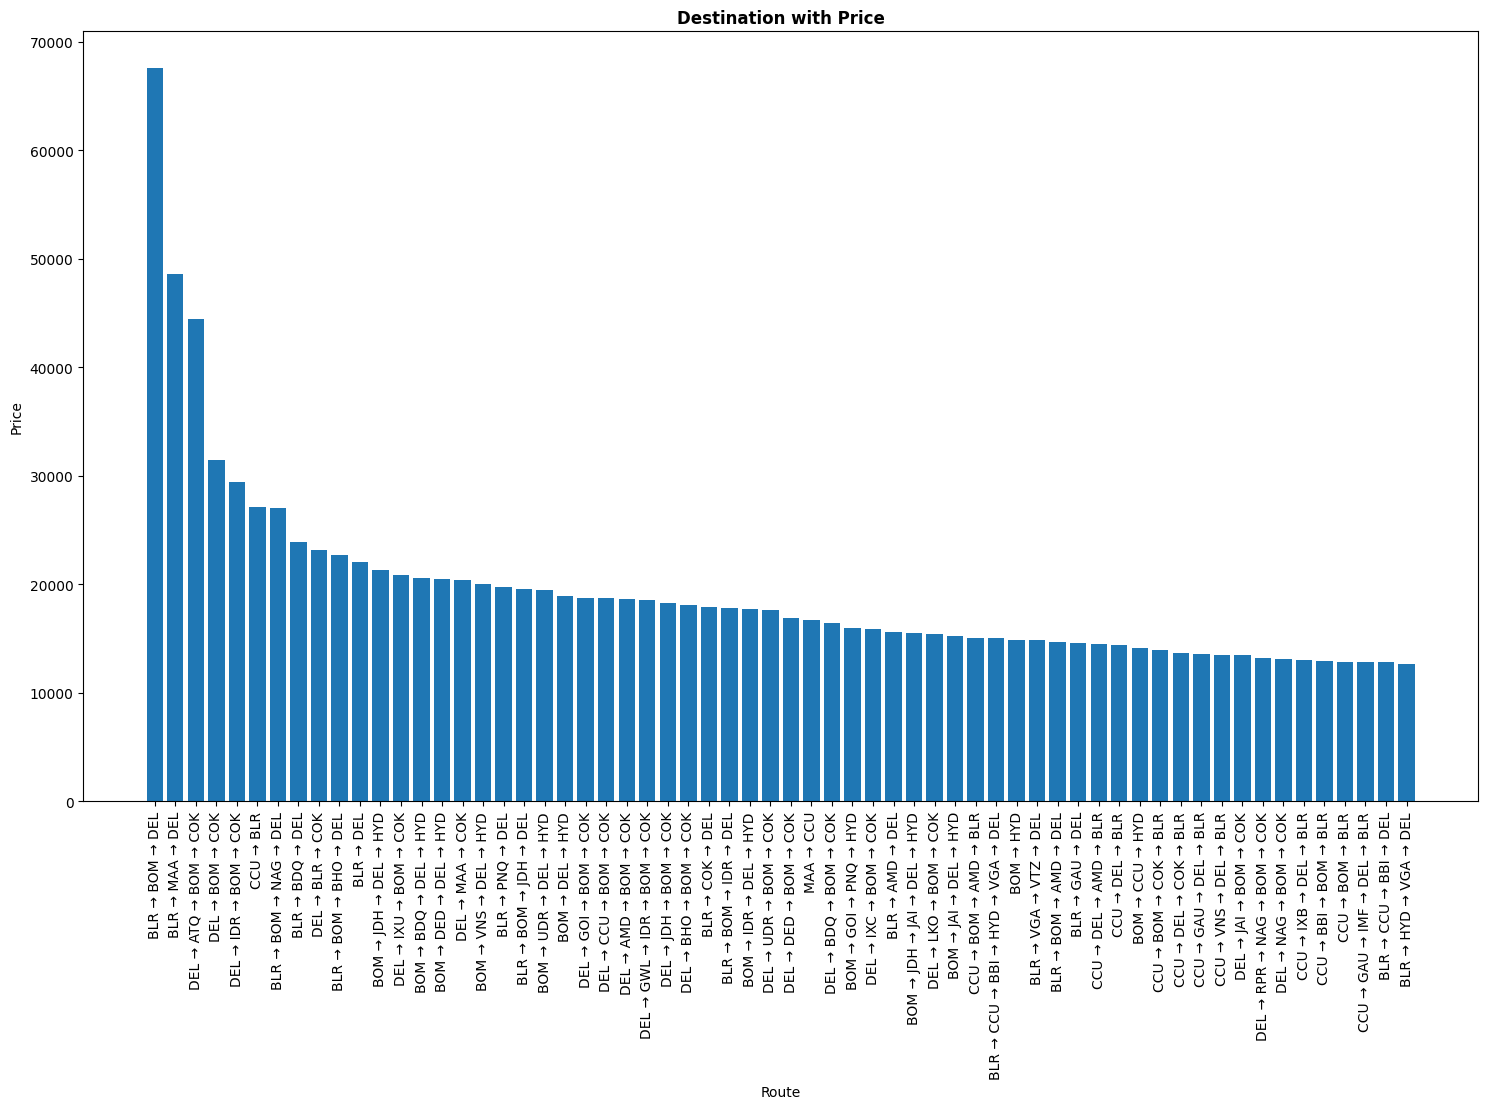

In [21]:
top_1000 = df1.sort_values("Price", ascending=False).head(1000)
plt.figure(figsize=(18, 10))
plt.bar(top_1000["Route"], top_1000["Price"])
plt.title("Destination with Price", fontweight="bold")
plt.xlabel("Route")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

In [22]:
print(df1.info())
print("Unique Date_of_Journey values:", df1["Date_of_Journey"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10683 non-null  int64  
 1   Airline          10683 non-null  object 
 2   Date_of_Journey  10683 non-null  object 
 3   Source           10683 non-null  object 
 4   Destination      10683 non-null  object 
 5   Route            10682 non-null  object 
 6   Dep_Time         10683 non-null  object 
 7   Arrival_Time     10683 non-null  object 
 8   Duration         10683 non-null  object 
 9   Total_Stops      10682 non-null  object 
 10  Additional_Info  10683 non-null  object 
 11  Price            10683 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1001.7+ KB
None
Unique Date_of_Journey values: ['24/03/2024' '1/05/2024' '9/06/2024' '12/05/2024' '01/03/2024'
 '24/06/2024' '12/03/2024' '27/05/2024' '1/06/2024' '18/04/2024'
 '9/05/2024' '24

In [23]:
df1["Date_of_Journey"] = pd.to_datetime(df1["Date_of_Journey"], format="%d/%m/%Y")
df1["Date"] = df1["Date_of_Journey"].dt.day
df1["Month"] = df1["Date_of_Journey"].dt.month
df1["Year"] = df1["Date_of_Journey"].dt.year 
df1.drop("Date_of_Journey", axis=1, inplace=True)

In [24]:

df1["Date"] = df1["Date"].astype(int)
df1["Month"] = df1["Month"].astype(int)
df1["Year"] = df1["Year"].astype(int)

In [25]:
print("Before stops processing:", df1["Total_Stops"].unique())
df1["Total_Stops"].replace(np.nan, "1 stop", inplace=True)
df1["Stops"] = df1["Total_Stops"].replace("non-stop", "1 stop")
df1["Stops"] = df1["Stops"].str.split(" ").str[0]
df1["Stops"] = df1["Stops"].astype(int)
df1.drop("Total_Stops", axis=1, inplace=True)

Before stops processing: ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


In [26]:
df1.rename(columns={"Stops": "Total_Stops"}, inplace=True)
print(df1.head(4))

   Unnamed: 0      Airline    Source Destination                  Route  \
0           0       IndiGo  Banglore   New Delhi              BLR → DEL   
1           1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2           2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3           3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   

  Dep_Time  Arrival_Time Duration Additional_Info     Price  Date  Month  \
0    22:20  01:10 22 Mar   2h 50m         No Info   3312.45    24      3   
1    05:50         13:15   7h 25m         No Info   6512.70     1      5   
2    09:25  04:25 10 Jun      19h         No Info  11799.70     9      6   
3    18:05         23:30   5h 25m         No Info   5285.30    12      5   

   Year  Total_Stops  
0  2024            1  
1  2024            2  
2  2024            2  
3  2024            1  


In [27]:
print("Unique Arrival_Time:", df1["Arrival_Time"].unique())


Unique Arrival_Time: ['01:10 22 Mar' '13:15' '04:25 10 Jun' ... '06:50 10 Mar' '00:05 19 Mar'
 '21:20 13 Mar']


In [28]:
df1["Arrival_Time"] = df1["Arrival_Time"].str.split(" ").str[0]
df1["Arrival_hour"] = df1["Arrival_Time"].str.split(":").str[0]
df1["Arrival_min"] = df1["Arrival_Time"].str.split(":").str[1]
df1.drop("Arrival_Time", axis=1, inplace=True)
df1["Arrival_hour"] = df1["Arrival_hour"].astype(int)
df1["Arrival_min"] = df1["Arrival_min"].astype(int)
print(df1.head(4))

   Unnamed: 0      Airline    Source Destination                  Route  \
0           0       IndiGo  Banglore   New Delhi              BLR → DEL   
1           1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2           2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3           3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   

  Dep_Time Duration Additional_Info     Price  Date  Month  Year  Total_Stops  \
0    22:20   2h 50m         No Info   3312.45    24      3  2024            1   
1    05:50   7h 25m         No Info   6512.70     1      5  2024            2   
2    09:25      19h         No Info  11799.70     9      6  2024            2   
3    18:05   5h 25m         No Info   5285.30    12      5  2024            1   

   Arrival_hour  Arrival_min  
0             1           10  
1            13           15  
2             4           25  
3            23           30  


In [29]:
print("Unique Dep_Time:", df1["Dep_Time"].unique())
df1["Dep_hour"] = df1["Dep_Time"].str.split(":").str[0]
df1["Dep_min"] = df1["Dep_Time"].str.split(":").str[1]
df1.drop("Dep_Time", axis=1, inplace=True)
df1["Dep_hour"] = df1["Dep_hour"].astype(int)
df1["Dep_min"] = df1["Dep_min"].astype(int)
print(df1.head(4))

Unique Dep_Time: ['22:20' '05:50' '09:25' '18:05' '16:50' '09:00' '18:55' '08:00' '08:55'
 '11:25' '09:45' '20:20' '11:40' '21:10' '17:15' '16:40' '08:45' '14:00'
 '20:15' '16:00' '14:10' '22:00' '04:00' '21:25' '21:50' '07:00' '07:05'
 '09:50' '14:35' '10:35' '15:05' '14:15' '06:45' '20:55' '11:10' '05:45'
 '19:00' '23:05' '11:00' '09:35' '21:15' '23:55' '19:45' '08:50' '15:40'
 '06:05' '15:00' '13:55' '05:55' '13:20' '05:05' '06:25' '17:30' '08:20'
 '19:55' '06:30' '14:05' '02:00' '09:40' '08:25' '20:25' '13:15' '02:15'
 '16:55' '20:45' '05:15' '19:50' '20:00' '06:10' '19:30' '04:45' '12:55'
 '18:15' '17:20' '15:25' '23:00' '12:00' '14:45' '11:50' '11:30' '14:40'
 '19:10' '06:00' '23:30' '07:35' '13:05' '12:30' '15:10' '12:50' '18:25'
 '16:30' '00:40' '06:50' '13:00' '19:15' '01:30' '17:00' '10:00' '19:35'
 '15:30' '12:10' '16:10' '20:35' '22:25' '21:05' '05:35' '05:10' '06:40'
 '15:15' '00:30' '08:30' '07:10' '05:30' '14:25' '05:25' '10:20' '17:45'
 '13:10' '22:10' '04:55' '17:50' '

In [30]:
df1["Additional_Info"] = df1["Additional_Info"].replace("No Info", "No info")


In [31]:
print("Columns:", df1.columns)


Columns: Index(['Unnamed: 0', 'Airline', 'Source', 'Destination', 'Route', 'Duration',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Total_Stops',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min'],
      dtype='object')


In [32]:
print("Unique Duration values:", df1["Duration"].unique())


Unique Duration values: ['2h 50m' '7h 25m' '19h' '5h 25m' '4h 45m' '2h 25m' '15h 30m' '21h 5m'
 '25h 30m' '7h 50m' '13h 15m' '2h 35m' '2h 15m' '12h 10m' '26h 35m'
 '4h 30m' '22h 35m' '23h' '20h 35m' '5h 10m' '15h 20m' '2h 55m' '13h 20m'
 '15h 10m' '5h 45m' '5h 55m' '13h 25m' '22h' '5h 30m' '10h 25m' '5h 15m'
 '2h 30m' '6h 15m' '11h 55m' '11h 5m' '8h 30m' '22h 5m' '2h 45m' '12h'
 '16h 5m' '19h 55m' '3h 15m' '25h 20m' '3h' '16h 15m' '15h 5m' '6h 30m'
 '25h 5m' '12h 25m' '27h 20m' '10h 15m' '10h 30m' '1h 30m' '1h 25m'
 '26h 30m' '7h 20m' '13h 30m' '5h' '19h 5m' '14h 50m' '2h 40m' '22h 10m'
 '9h 35m' '10h' '21h 20m' '18h 45m' '12h 20m' '18h' '9h 15m' '17h 30m'
 '16h 35m' '12h 15m' '7h 30m' '24h' '8h 55m' '7h 10m' '14h 30m' '30h 20m'
 '15h' '12h 45m' '10h 10m' '15h 25m' '14h 5m' '20h 15m' '23h 10m'
 '18h 10m' '16h' '2h 20m' '8h' '16h 55m' '3h 10m' '14h' '23h 50m'
 '21h 40m' '21h 15m' '10h 50m' '8h 15m' '8h 35m' '11h 50m' '27h 35m'
 '8h 25m' '20h 55m' '4h 50m' '8h 10m' '24h 25m' '23h 35m' '2

In [33]:
df1["Duration_hour"] = df1["Duration"].str.split(" ").str[0]
df1["Duration_hour"] = df1["Duration_hour"].str.split("h").str[0]
df1["Duration_min"] = df1["Duration"].str.split(" ").str[1]
df1["Duration_min"] = df1["Duration_min"].str.split("m").str[0]
df1.drop("Duration", axis=1, inplace=True)

In [34]:
df1["Duration_min"] = df1["Duration_min"].replace(np.nan, "0")
df1["Duration_hour"] = df1["Duration_hour"].replace("5m", "5")
df1["Duration_min"] = df1["Duration_min"].astype(int)
df1["Duration_hour"] = df1["Duration_hour"].astype(int)
print("Duration_min unique:", df1["Duration_min"].unique())

Duration_min unique: [50 25  0 45 30  5 15 35 10 20 55 40]


In [35]:
print("Duration_hour unique:", df1["Duration_hour"].unique())


Duration_hour unique: [ 2  7 19  5  4 15 21 25 13 12 26 22 23 20 10  6 11  8 16  3 27  1 14  9
 18 17 24 30 28 29 37 34 38 35 36 47 33 32 31 42 39 41 40]


In [36]:
print("Unique Routes:", df1["Route"].unique())


Unique Routes: ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU

In [37]:
df1["Route_1"] = df1["Route"].str.split(" → ").str[0]
df1["Route_2"] = df1["Route"].str.split(" → ").str[1]
df1["Route_3"] = df1["Route"].str.split(" → ").str[2]
df1["Route_4"] = df1["Route"].str.split(" → ").str[3]
df1["Route_5"] = df1["Route"].str.split(" → ").str[4]

In [38]:
df1["Route_5"] = df1["Route"].str.split(" → ").str[4]
df1["Route_1"].fillna("None", inplace=True)
df1["Route_2"].fillna("None", inplace=True)
df1["Route_3"].fillna("None", inplace=True)
df1["Route_4"].fillna("None", inplace=True)
df1["Route_5"].fillna("None", inplace=True)

In [39]:
df1.drop("Route", axis=1, inplace=True)


In [40]:

print(df1.head(5))
print(df1.info())
print("Null counts:\n", df1.isnull().sum())

   Unnamed: 0      Airline    Source Destination Additional_Info     Price  \
0           0       IndiGo  Banglore   New Delhi         No info   3312.45   
1           1    Air India   Kolkata    Banglore         No info   6512.70   
2           2  Jet Airways     Delhi      Cochin         No info  11799.70   
3           3       IndiGo   Kolkata    Banglore         No info   5285.30   
4           4       IndiGo  Banglore   New Delhi         No info  11306.70   

   Date  Month  Year  Total_Stops  ...  Arrival_min  Dep_hour  Dep_min  \
0    24      3  2024            1  ...           10        22       20   
1     1      5  2024            2  ...           15         5       50   
2     9      6  2024            2  ...           25         9       25   
3    12      5  2024            1  ...           30        18        5   
4     1      3  2024            1  ...           35        16       50   

   Duration_hour  Duration_min  Route_1 Route_2 Route_3 Route_4 Route_5  
0           

### Model building

In [41]:
df = pd.read_csv("data/train.csv")
df.drop(columns=["Route"], errors="ignore", inplace=True)
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")
df["Date"] = df["Date_of_Journey"].dt.day
df["Month"] = df["Date_of_Journey"].dt.month
df["Year"] = df["Date_of_Journey"].dt.year
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [42]:
def extract_time(t):
    # Remove any trailing date part (e.g., "04:25 07 Jun") and keep "HH:MM"
    return t.split()[0].strip()

In [43]:
df["Arrival_Time"] = df["Arrival_Time"].apply(extract_time)
df["Arrival_hour"] = df["Arrival_Time"].apply(lambda x: int(x.split(":")[0]))
df["Arrival_min"] = df["Arrival_Time"].apply(lambda x: int(x.split(":")[1]))
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [44]:
if "Dep_Time" in df.columns:
    df.drop(["Dep_Time"], axis=1, inplace=True) 

In [45]:
def parse_duration(d):
    d = d.lower().strip()
    hours = 0
    mins = 0
    if "h" in d:
        parts = d.split("h")
        hours = int(parts[0])
        if "m" in parts[1]:
            mins = int(parts[1].replace("m", "").strip()) if parts[1] else 0
    elif "m" in d:
        mins = int(d.replace("m", "").strip())
    return hours, mins

In [46]:
df["Duration_hour"], df["Duration_min"] = zip(*df["Duration"].apply(parse_duration))
df.drop(["Duration"], axis=1, inplace=True)

In [47]:
if "Total_Stops" in df.columns:
    df["Total_Stops"] = df["Total_Stops"].str.lower().fillna("0")
    df["Total_Stops"] = df["Total_Stops"].replace("non-stop", "0 stop")
    df["Total_Stops"] = df["Total_Stops"].apply(lambda s: int(s.split()[0]) if "stop" in s else 0)

In [48]:
col_list = [
    "Airline", "Source", "Destination", "Additional_Info",
    "Date", "Month",
    "Total_Stops",
    "Dep_hour", "Dep_min",
    "Arrival_hour", "Arrival_min",
    "Duration_hour", "Duration_min"
]

In [49]:
use_cols = [c for c in col_list if c in df.columns]
X = df[use_cols].copy()
y = df["Price"].copy()

In [50]:
encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].str.strip())
    encoders[col] = le
joblib.dump(encoders, "models/saved_encoders.pkl")
print("Encoders saved successfully (Route excluded).")

Encoders saved successfully (Route excluded).


In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
joblib.dump(x_test, "models/x_testing.pkl")
joblib.dump(y_test, "models/y_testing.pkl")
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (7478, 11)
Shape of x_test: (3205, 11)
Shape of y_train: (7478,)
Shape of y_test: (3205,)


In [52]:
model_lasso = SelectFromModel(Lasso(alpha=0.005, max_iter=500, random_state=0))
model_lasso.fit(x_train, y_train)
print("Lasso-chosen columns:", x_train.columns[model_lasso.get_support()])

Lasso-chosen columns: Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Total_Stops', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min'],
      dtype='object')


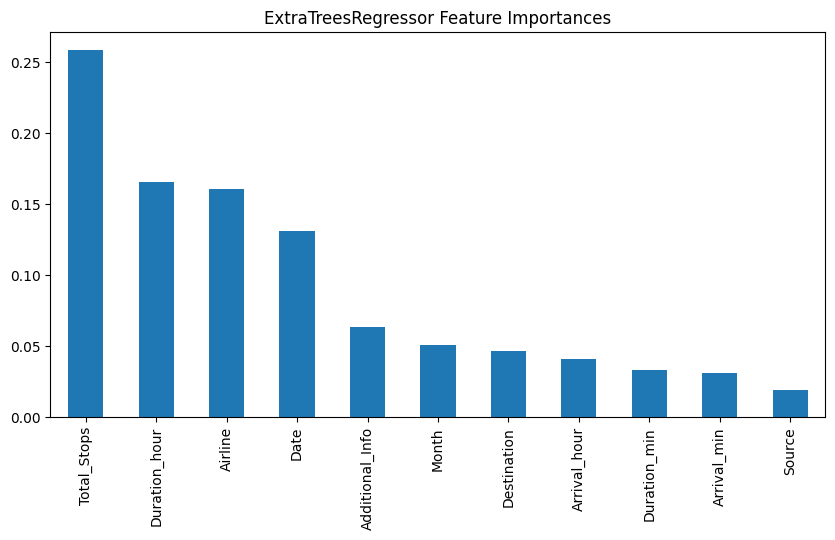

In [53]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
plt.figure(figsize=(10, 5))
feature_imp = pd.Series(etr.feature_importances_, index=x_train.columns)
feature_imp.nlargest(len(x_train.columns)).plot(kind="bar")
plt.title("ExtraTreesRegressor Feature Importances")
plt.show()

In [54]:
def evaluate_model(clf, x_tr, y_tr, x_te, y_te):
    clf.fit(x_tr, y_tr)
    preds = clf.predict(x_te)
    r2 = r2_score(y_te, preds)
    mae = mean_absolute_error(y_te, preds)
    mse = mean_squared_error(y_te, preds)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [55]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}

In [56]:
results = {}
for name, reg in models.items():
    r2, mae, mse, rmse = evaluate_model(reg, x_train, y_train, x_test, y_test)
    results[name] = {"R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

In [57]:
results_df = pd.DataFrame.from_dict(results, orient="index")
print("\nComparison of models:\n", results_df)



Comparison of models:
                         R2          MAE           MSE         RMSE
RandomForest      0.865534   594.248380  1.962305e+06  1400.822923
GradientBoosting  0.825343  1076.752260  2.548830e+06  1596.505470
DecisionTree      0.819209   634.275525  2.638356e+06  1624.301734
SVR               0.028227  2941.024070  1.418143e+07  3765.824000


In [58]:
best_model_name = max(results, key=lambda nm: results[nm]["R2"])
best_model = models[best_model_name]
best_model.fit(x_train, y_train)
joblib.dump(best_model, "models/best_ml_model.pkl")
print(f"\n'{best_model_name}' is the best model, saved to 'models/best_ml_model.pkl'.")


'RandomForest' is the best model, saved to 'models/best_ml_model.pkl'.
